# Homework 1: Tidy Data and Cleaning (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

**Please double check that you have submitted a completed version of the homework!!!**

**<u>Deadline</u>**:

This assignment is due on **Friday, March 29** at **11:59pm**.

- Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

- You should start early so that you have time to get help if you're stuck.

- Submit your homework 30-60 minutes to ensure that it will upload before the deadline.

- Please run all of your code cells and ensure all of your answers are outputted and visible to graders.

- Check the **file preview on Gradescope** to make sure all of your answers are visible.

- Be mindful of your file sizes. Do not print out entire large datasets use .head or .tail instead. Make sure your document is visible in the Gradescope preview.

- Your functions should have a docstring. Points may be taken off for not including a docstring.

- Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. Intervals on x- and y-axises should make sense for the data. If these items are missing, points may be taken off.

In [13]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plot.style.use('fivethirtyeight')

## 1. Untidy Data (21 points) 


**Question 1: (2pts)** Read in the data file 'untidy1.txt' correctly.

In [242]:
untidy1 = pd.read_csv("../data/untidy1.txt", \
            comment='#')
untidy1

,Hippo,hippopotamus amphibious,(431lb/2m),01/15/2019
0,Dog,canis lupus familiaris,(7.3kg/600cm),2-04-2022
1,Lion,panthers Leo,(300kg/5m),3-14-24
2,Peacock,pavo cristatus,(30lb/60cm),01-15-23
3,Fox,vulpes vulpes,(45lb/70cm),06/16/12
4,Giraffe,giraffe Camelopardalis,(562lb/5.5m),5-02-2018
5,House mouse,must muscles,(1lb/15cm),04/23/2022


**Question 2: (3pts)** This data is untidy. List the things wrong with this dataset.


1. The column headers are values, not variable names (ex. 'Hippo', 'hippopotamus amphibious', etc.)



2. The dates in what should be the "date observed" column are formatted differently (ex. '01/15/2019' vs. '3-14-24')



3. The values in what should be the "weight/length" have differing units ex. (Dog: 7.3kg/600cm vs. Peacock: 30 lb/60cm


4. The column 'weight/length' itself should probably be split into two columns, as it contains two variables: weight and length


(Depending on how you count the above mistakes you could have 3-5)

The goal of the following questions is to make the data *tidy*. (That is, all the mistakes you listed above, should be fixed by the end of the section.)

**Question 3: (10pts)** We are interested in the average weight (in lbs) and the average length (in cm) of all the animals included in the data. Find these average values. To compute this, you should first make a tidier version of the original DataFrame.

In [243]:
tidy1 = pd.read_csv("../data/untidy1.txt", \
            comment='#', names = ['name', 'species', 'weight/length', 'date observed'])
tidy1

,name,species,weight/length,date observed
0,Hippo,hippopotamus amphibious,(431lb/2m),01/15/2019
1,Dog,canis lupus familiaris,(7.3kg/600cm),2-04-2022
2,Lion,panthers Leo,(300kg/5m),3-14-24
3,Peacock,pavo cristatus,(30lb/60cm),01-15-23
4,Fox,vulpes vulpes,(45lb/70cm),06/16/12
5,Giraffe,giraffe Camelopardalis,(562lb/5.5m),5-02-2018
6,House mouse,must muscles,(1lb/15cm),04/23/2022


In [244]:
def kg_to_lbs(x):
    'Takes in a value in kilograms (kg) and returns its equivalent in pounds (lbs)'
    if "kg" in x:
        y = pd.to_numeric(x.replace('kg', ''))
        return y * 2.205
    else:
        return x.replace('lb', '')

def m_to_cm(x):
    'Takes in a value in meters (m) and returns its equivalent in centimeters (cm)'
    if 'cm' in x:
        return x.replace('cm', '')
    elif 'm' in x:
        y = pd.to_numeric(x.replace('m', ''))
        return y * 100
    else:
        return x.replace

In [245]:
tidy1.columns

Index(['name', 'species', 'weight/length', 'date observed'], dtype='object')

In [246]:
tidy1[['weight', 'length']] = tidy1['weight/length'].str.extract(r'\((.*?)\/(.*?)\)')
tidy1.drop(columns=['weight/length'], inplace=True)
tidy1

,name,species,date observed,weight,length
0,Hippo,hippopotamus amphibious,01/15/2019,431lb,2m
1,Dog,canis lupus familiaris,2-04-2022,7.3kg,600cm
2,Lion,panthers Leo,3-14-24,300kg,5m
3,Peacock,pavo cristatus,01-15-23,30lb,60cm
4,Fox,vulpes vulpes,06/16/12,45lb,70cm
5,Giraffe,giraffe Camelopardalis,5-02-2018,562lb,5.5m
6,House mouse,must muscles,04/23/2022,1lb,15cm


In [247]:
tidy1['weight (in lbs)'] = pd.to_numeric(tidy1.weight.apply(kg_to_lbs)).round(1)
tidy1['length (in cm)'] = pd.to_numeric(tidy1.length.apply(m_to_cm)).round(1)

tidy1.drop(columns = ['weight', 'length'], inplace=True)

tidy1

,name,species,date observed,weight (in lbs),length (in cm)
0,Hippo,hippopotamus amphibious,01/15/2019,431.0,200.0
1,Dog,canis lupus familiaris,2-04-2022,16.1,600.0
2,Lion,panthers Leo,3-14-24,661.5,500.0
3,Peacock,pavo cristatus,01-15-23,30.0,60.0
4,Fox,vulpes vulpes,06/16/12,45.0,70.0
5,Giraffe,giraffe Camelopardalis,5-02-2018,562.0,550.0
6,House mouse,must muscles,04/23/2022,1.0,15.0


In [248]:
tidy_averages = pd.DataFrame({'average weight (in lbs)': [tidy1['weight (in lbs)'].mean()], 
                              'average height (in cms)': [tidy1['length (in cm)'].mean()]})

tidy_averages

,average weight (in lbs),average height (in cms)
0,249.514286,285.0



**Question 4: (6 pts)** Fix the remaining errors to output a tidy version of the given DataFrame.

In [249]:
def standardize_date(x):
    'standardizes the date in the "date observed" column'
    if x[0] == '0':
        y = x[1:]
    else:
        return x
    
    return y

In [250]:
tidy1['species'] = tidy1['species'].str.lower()
tidy1['date observed'] = tidy1['date observed'].str.replace('-', '/').str.replace('20', '').apply(standardize_date)

tidy1

,name,species,date observed,weight (in lbs),length (in cm)
0,Hippo,hippopotamus amphibious,01/15/19,431.0,200.0
1,Dog,canis lupus familiaris,2/04/22,16.1,600.0
2,Lion,panthers leo,3/14/24,661.5,500.0
3,Peacock,pavo cristatus,01/15/23,30.0,60.0
4,Fox,vulpes vulpes,06/16/12,45.0,70.0
5,Giraffe,giraffe camelopardalis,5/02/18,562.0,550.0
6,House mouse,must muscles,04/23/22,1.0,15.0


# 2. AirBnB Pricing  (29 points)

We can visually investigate AirBnB prices in some popular European cities using the “Airbnb Prices in European Cities” dataset. There are twenty different .csv files describing prices in Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, and Vienna. The .csv files include various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends.

variable description:

realSum: the full price of accommodation for two people and two nights in EUR

room_type: the type of the accommodation 

room_shared: dummy variable for shared rooms

room_private: dummy variable for private rooms

person_capacity: the maximum number of guests 

host_is_superhost: dummy variable for superhost status

multi: dummy variable if the listing belongs to hosts with 2-4 offers

biz: dummy variable if the listing belongs to hosts with more than 4 offers

cleanliness_rating: cleanliness rating

guest_satisfaction_overall: overall rating of the listing

bedrooms: number of bedrooms (0 for studios)

dist: distance from city centre in km

metro_dist: distance from nearest metro station in km

attr_index: attraction index of the listing location (accessibility of attractions within the city limits)

attr_index_norm: normalised attraction index (0-100)

rest_index: restaurant index of the listing location (accessibility of restaurants within the city limits)

attr_index_norm: normalised restaurant index (0-100)

lng: longitude of the listing location

lat: latitude of the listing location
 

In [2]:
city_list = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome','vienna']

**Question 5 (10pts):** Write a loop to convert the .csv files into a single tidy dataset. Make sure to document your code. 

In [3]:
dfs_weekdays = []
dfs_weekends = []


for city in city_list:
    df = pd.read_csv(f'../data/HW1_data/{city}_weekdays.csv')
    df['city'] = city
    df['time of week'] = 'weekday'
    dfs_weekdays.append(df)
    
for city in city_list:
    df = pd.read_csv(f'../data/HW1_data/{city}_weekends.csv')
    df['city'] = city
    df['time of week'] = 'weekend'
    dfs_weekends.append(df)
    
combined_df = pd.concat(dfs_weekdays + dfs_weekends, ignore_index=True).drop(columns = 'Unnamed: 0')

combined_df

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,time of week
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekday
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekday
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekday
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekday
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekend
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekend
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekend
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekend


**Question 6: (2pts)** In a sentence or two justify why the dataset you built is tidy.

I believe the dataset I built is tidy because all my units in each category are consistent. Also, I added two columns, 'city' and 'time of week' to distinguish between weekday and weekend variables and different locations.

**Question 7: (1pt)** Print the dimensions of the dataset.

In [4]:
print(f'The dimensions of the dataset are {combined_df.shape[0]} by {combined_df.shape[1]}.')

The dimensions of the dataset are 51707 by 21.


**Question 8: (2pts)** Give the mean AirBnB price over all of the listed European cities for weekends as well as the mean price over all cities for weekdays.

In [5]:
combined_df.groupby('time of week').mean(numeric_only=True)[['realSum']]

,realSum
time of week,
weekday,275.681904
weekend,283.964035


**Question 9: (7pts)** Create one bar chart using appropriate variables of your choice from the dataset. You can also incorporate different encoding channels like color, size, etc., but the variable types must be suitable for the graphs you use and you should be following best practices for data visualization. **Include a one - two sentence description of your graph**

In [6]:
combined_df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


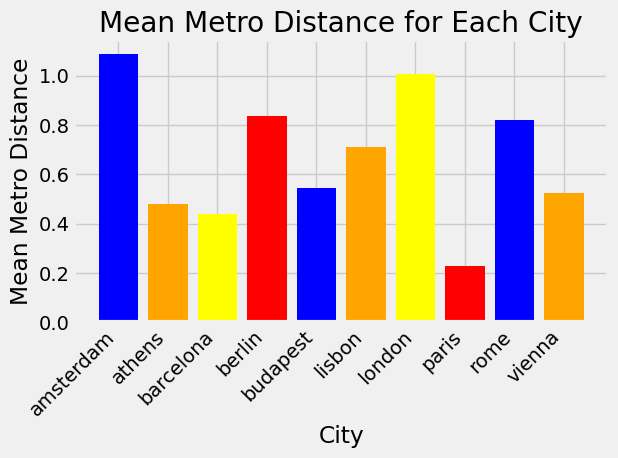

In [20]:
metro_dist_df = combined_df.groupby('city').mean(numeric_only=True)[['metro_dist']]
mean_metro_dists = [metro_dist_df.loc[city, 'metro_dist'] for city in city_list]

plt.bar(city_list, mean_metro_dists, color = ['blue', 'orange', 'yellow', 'red'])
plt.xlabel('City')
plt.ylabel('Mean Metro Distance')
plt.title('Mean Metro Distance for Each City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

This bar graph plots the average distance to a metro station for AirBnB's in each European city.

**Question 10: (7pts)** Create one histogram or one scatterplot using appropriate variables of your choice from the dataset. You can also incorporate different encoding channels like color, size, etc., but the variable types must be suitable for the graphs you use and you should be following best practices for data visualization. **Include a one - two sentence description of your graph**

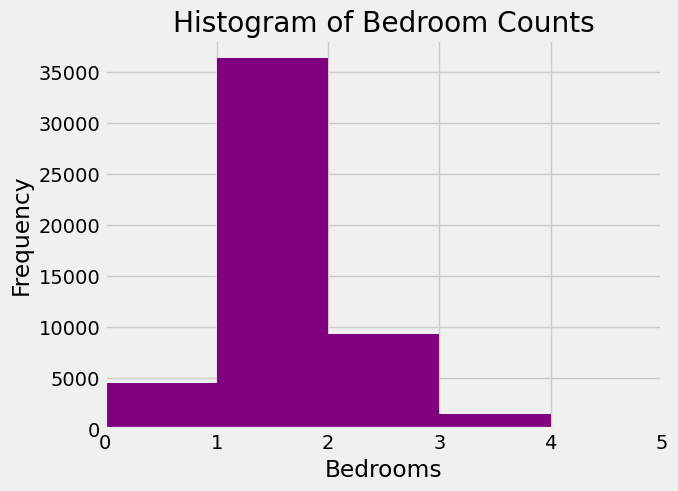

In [35]:
plt.hist(combined_df.bedrooms, bins=10, color = 'purple')

plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bedroom Counts')
plt.xlim(0, 5)

plt.show()

This histogram plots the frequency of the # of bedrooms in the combined dataset.